In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/ANN/Churn_Modelling/Churn_Modelling.csv")
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# create dummy variables:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)


In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X.drop(["Geography","Gender"],axis=1,inplace=True)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_train)

In [ ]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
#ANN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#Intialising the ANN
classifier = Sequential()

In [ ]:
#Adding input layer
classifier.add(Dense(units=11,activation="relu"))

In [ ]:
#creating Hidden Layer 1
classifier.add(Dense(units=6,activation="relu"))

In [ ]:
#creating Hidden Layer 2
classifier.add(Dense(units=4,activation="relu"))

In [ ]:
#Creating output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 15s 10ms/step - loss: 0.5324 - accuracy: 0.7822 - val_loss: 0.4609 - val_accuracy: 0.7978
Epoch 2/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4334 - accuracy: 0.8048 - val_loss: 0.4278 - val_accuracy: 0.8039
Epoch 3/100
536/536 [==============================] - 6s 10ms/step - loss: 0.4050 - accuracy: 0.8140 - val_loss: 0.4065 - val_accuracy: 0.8069
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3846 - accuracy: 0.8194 - val_loss: 0.3922 - val_accuracy: 0.8114
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3732 - accuracy: 0.8194 - val_loss: 0.3861 - val_accuracy: 0.8148
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3666 - accuracy: 0.8207 - val_loss: 0.3815 - val_accuracy: 0.8175
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3618 - accuracy: 0.8395 - val_loss: 0.3802 - val_accuracy: 0.

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

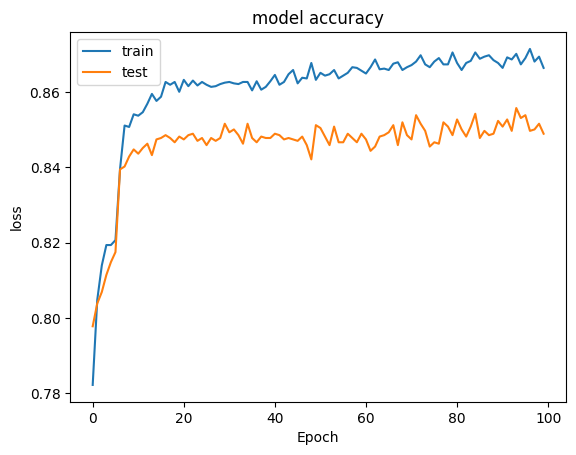

In [ ]:
# summarize history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 7s 12ms/step - loss: 0.3143 - accuracy: 0.8688 - val_loss: 0.3637 - val_accuracy: 0.8573
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3147 - accuracy: 0.8668 - val_loss: 0.3620 - val_accuracy: 0.8497
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3150 - accuracy: 0.8699 - val_loss: 0.3592 - val_accuracy: 0.8501
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3151 - accuracy: 0.8666 - val_loss: 0.3627 - val_accuracy: 0.8523
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3146 - accuracy: 0.8699 - val_loss: 0.3629 - val_accuracy: 0.8448
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3147 - accuracy: 0.8692 - val_loss: 0.3631 - val_accuracy: 0.8504
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3149 - accuracy: 0.8675 - val_loss: 0.3636 - val_accuracy: 0.847